In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
# import pandas as pd 
import os
import json 

In [ ]:
# Small excursion to load jsonfiles

# with open('../Config_files/Wrapping_two_0.3_strg_250_radius_0.3_KA_15_KB_10.json', 'r') as file:
#     data = json.load(file)
# data['Beads'][0]['Pos']
# data['Beads'][1]['Pos']

Now i want to check all the directories in the folder

In [2]:
current_dir = os.getcwd()
current_dir



'/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts'

In [5]:
Results_dir = current_dir+'/../Results/'
Sims_dir = Results_dir + '/Particle_wrapping_in_vesicle/'


In [6]:
Sims_dir

'/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/build/../Results//Particle_wrapping_in_vesicle/'

Now we have the directory to start finally our processing


In [7]:
dir_list = os.listdir(Sims_dir)

print("The directories are :\n")
for i in dir_list:
    print("{}".format(i))

The directories are :

1
3
4
5
2


In [8]:
Thetas = []
E_Bead_1 = []
E_Bead_2 = []
E_Bend = []
E_Sur = []

In [10]:
i = 5
Simulation = Sims_dir+"5"+"/"
Output_dir = Simulation+'Output_data.txt'
print(Output_dir)

Sim_data = np.loadtxt(Output_dir,skiprows=1,usecols=[3,4,5,6,7])

E_Bend = Sim_data[:,1]
E_Sur = Sim_data[:,0]
E_Reg = Sim_data[:,2]
E_Bead_1 = Sim_data[:,3]
E_Tot = Sim_data[:,4]



/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/build/../Results//Particle_wrapping_in_vesicle/5/Output_data.txt


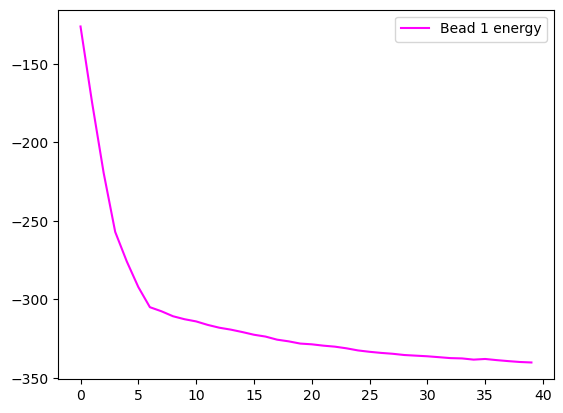

In [18]:
# plt.plot(E_Bend, label='Bending energy',color='purple')
# plt.plot(E_Reg, label='Regularizer')
plt.plot(E_Bead_1, label='Bead 1 energy',color='magenta')
# plt.plot(E_Tot, label='Total energy',color='black')
plt.legend()

In [30]:


for i in dir_list:
    Simulation = Sims_dir+i+"/"
    # I need to read the output data
    Output_dir = Simulation+"Output_data.txt"
    print(Output_dir)
    Sim_data = np.loadtxt(Output_dir,skiprows=1,usecols=[3,4,5,6,7,8])
    # print(Sim_data)
    json_data = json.load(open(Simulation+"Input_file.json"))
    Pos1 = json_data['Beads'][0]['Pos']
    Pos2 = json_data['Beads'][1]['Pos']
    # print(Pos1[0])
    theta = np.arctan2(Pos1[1],Pos1[0])
    theta2 = np.arctan2(Pos2[1],Pos2[0])
    print("angles are {} and {}".format(theta,theta2))
    # I have the angle Now i want the final ENergy for each state
    Thetas.append(theta)
    E_Bend.append(Sim_data[-1,0])
    E_Sur.append(Sim_data[-1,1])
    E_Bead_1.append(Sim_data[-1,3])
    E_Bead_2.append(Sim_data[-1,4])
    



/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_with_switch_manual/1/Output_data.txt
angles are 0.3 and -0.3
/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_with_switch_manual/11/Output_data.txt
angles are 1.2 and -1.2
/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_with_switch_manual/2/Output_data.txt
angles are 0.35000000000000003 and -0.35000000000000003


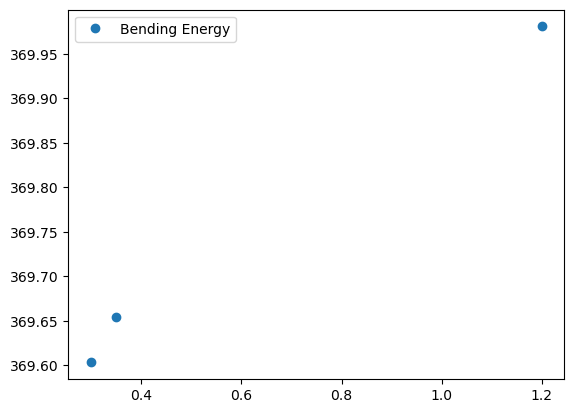

In [36]:
plt.plot(Thetas,E_Bend,'o',label='Bending Energy')
# plt.plot(Thetas,E_Sur,'o',label='Surface Energy')
# plt.plot(Thetas,E_Bead_1,'o',label='Bead 1 Energy')
# plt.plot(Thetas,E_Bead_2,'o',label='Bead 2 Energy')
plt.legend()

In [37]:
# Last step is to export the Energies to a text file
Energies = np.array([Thetas,E_Bend,E_Sur,E_Bead_1,E_Bead_2])

Processed_Energy_data_dir = Results_dir + 'Processed_data/'
if not os.path.exists(Processed_Energy_data_dir):
    os.makedirs(Processed_Energy_data_dir)
Energy_data_file = Processed_Energy_data_dir + 'Two_beads_with_switch_manual_energy_data.txt'
np.savetxt(Energy_data_file,Energies.T,header="Theta\tE_Bend\tE_Sur\tE_Bead_1\tE_Bead_2")


In [4]:
Results_dir = current_dir+'/../Results/'
Sims_dir = Results_dir + 'Mem_shape_new/'

THe first file is the evolution from cilinder to sphere using only gradient descent and bending energy with a volume constraint

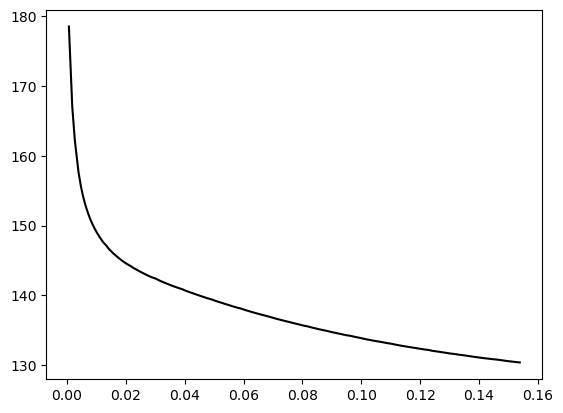

In [5]:
Simulation = Sims_dir +"Bending_10.0000_0.0000_Volume_constraint_10000.0000_0.5538_Edge_reg_0.0000_Switch_Newton_Switch_No_remesh_Switch_Save_all_Nsim_1/"

Sim_data = np.loadtxt(Simulation+"Output_data.txt",skiprows=1)

# plt.plot(Sim_data[:,0])


E_Bending = Sim_data[:,3 ]
E_Volume  = Sim_data[:,4]
E_Tot = Sim_data[:,6]

# plt.plot(Sim_data[:,0],E_Bending/(4*np.pi*10),color='purple')
# plt.plot(Sim_data[:,0],E_Volume,color='magenta')
plt.plot(Sim_data[:,0],E_Tot, color='black')



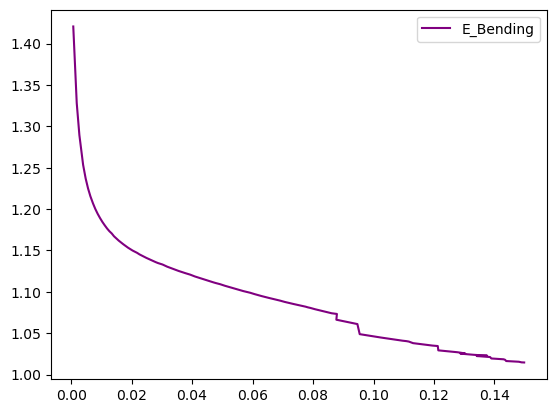

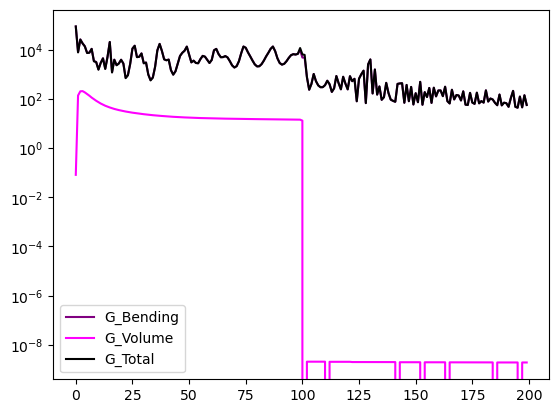

In [6]:
Simulation_2 = Sims_dir +"1/"

Sim_data_2 = np.loadtxt(Simulation_2+"Output_data.txt",skiprows=1)

# plt.plot(Sim_data[:,0])


E_Bending_2 = Sim_data_2[:,3 ]
E_Volume_2  = Sim_data_2[:,4]
E_Tot_2 = Sim_data_2[:,6]

plt.plot(Sim_data_2[:,0],E_Bending_2/(4*np.pi*10),color='purple',label='E_Bending')
plt.legend()
# plt.plot(Sim_data_2[:,0],E_Volume_2,color='magenta')
# plt.plot(E_Tot_2, color='black')
# plt.xlim(0.12,0.14)
plt.show()

G_Bending_2 = Sim_data_2[:,7]
G_Volume_2 = Sim_data_2[:,8]
G_Tot_2 = Sim_data_2[:,10]

plt.plot(G_Bending_2,color='purple',label='G_Bending')
plt.plot(G_Volume_2,color='magenta',label='G_Volume')
plt.plot(G_Tot_2, color='black',label= 'G_Total')
plt.legend()
plt.yscale('log')
plt.show()

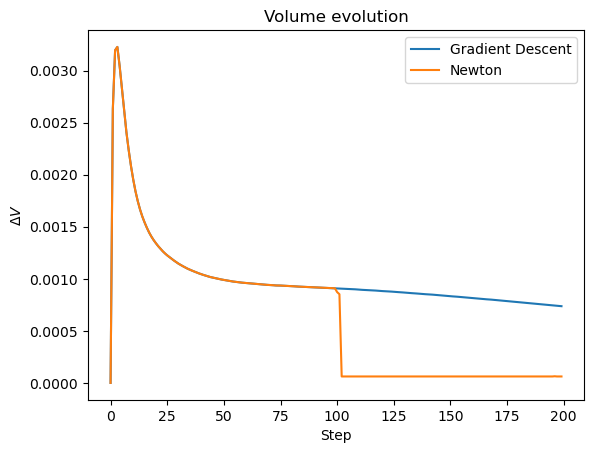

In [7]:
plt.title("Volume evolution")
plt.plot(Sim_data[:,1]-Sim_data[0,1],label='Gradient Descent')
plt.plot(Sim_data_2[:,1]-Sim_data_2[0,1],label='Newton')
plt.xlabel("Step")
plt.ylabel(r"$\Delta V$")
plt.legend()

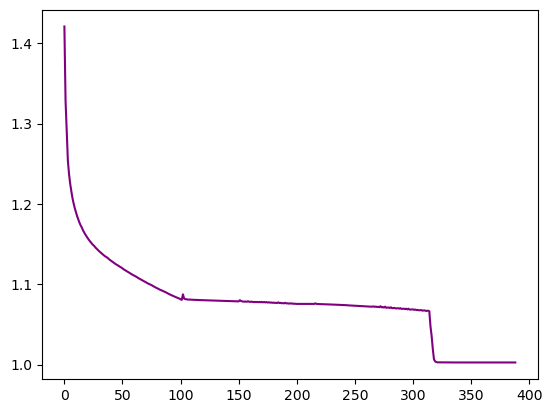

In [8]:
Simulation_3 = Sims_dir +"4/"

Sim_data_3 = np.loadtxt(Simulation_3+"Output_data.txt",skiprows=1)

# plt.plot(Sim_data[:,0])


E_Bending_3 = Sim_data_3[:,3 ]
E_Volume_3  = Sim_data_3[:,4]
E_Tot_3 = Sim_data_3[:,6]

plt.plot(E_Bending_3/(4*np.pi*10),color='purple')
# plt.xlim(0,1)
# plt.plot(Sim_data_2[:,0],E_Volume_2,color='magenta')
# plt.plot(E_Tot_2, color='black')
# plt.xlim(0.12,0.14)

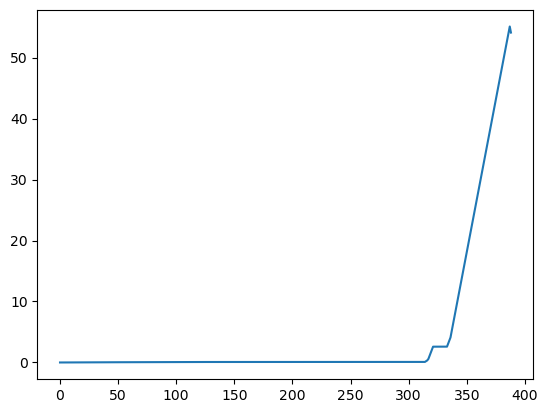

In [9]:
plt.plot(Sim_data_3[:,0])
# plt.xlim(100,110)

In [10]:
print("THe min at first run is {} and at the second run is {}".format(np.min(E_Tot),np.min(E_Tot_2)))

THe min at first run is 130.389 and at the second run is 127.502


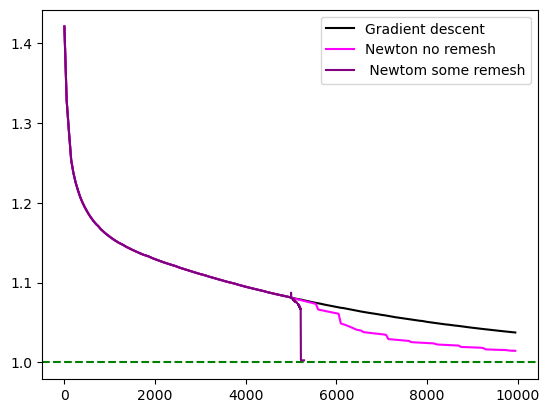

In [11]:
plt.axhline(1.0,ls='dashed',color='green')

steps = [i*50 for i in range(len(E_Bending))]

steps_2 = [i*50 for i in range( 100)] + [5000 + i for i in range(len(E_Bending_3)-100)]
plt.plot(steps,E_Bending/(4*10*np.pi),color='black',label = "Gradient descent",)
plt.plot(steps,E_Bending_2/(4*10*np.pi),color='magenta' ,label = "Newton no remesh")
plt.plot(steps_2,E_Bending_3/(4*np.pi*10),color='purple',label=" Newtom some remesh")
plt.legend()# plt.xlim(100,120)



We are gonna explore now what happens when we add an area constraint 

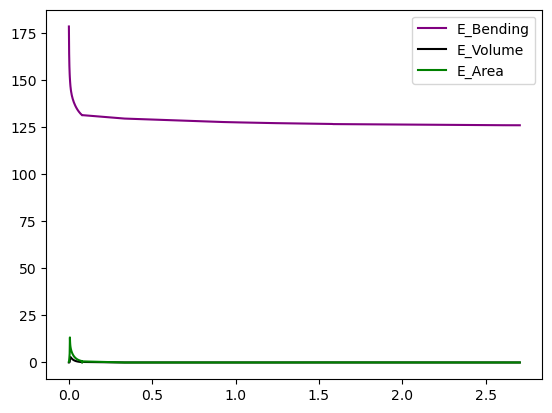

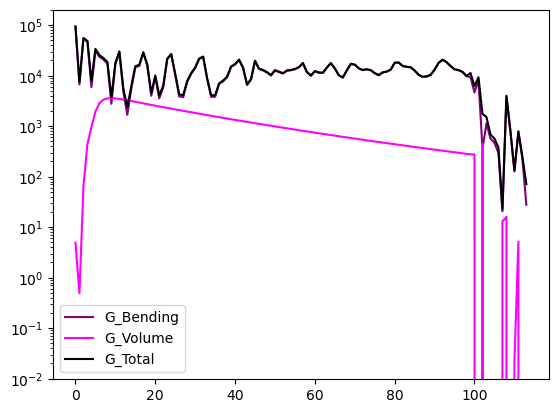

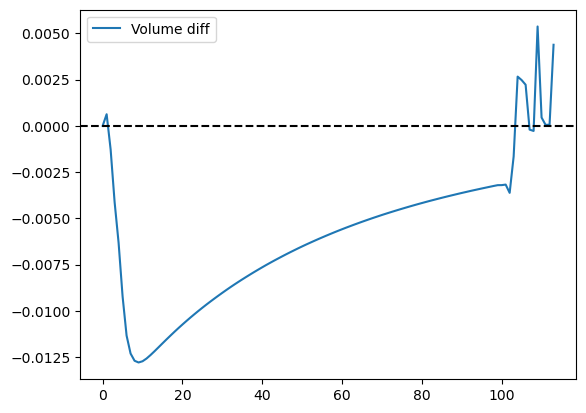

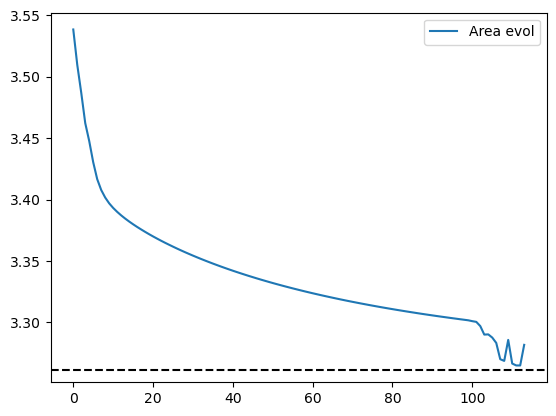

In [12]:
Simulation_sphere_A = Sims_dir +"Bending_10.0000_0.0000_Volume_constraint_10000.0000_0.5538_Area_constraint_10000.0000_3.5591_1.0000_-0.0010_Edge_reg_0.0000_Switch_Newton_Switch_No_remesh_Switch_Save_all_Nsim_1/"

Sim_data_sphere_A = np.loadtxt(Simulation_sphere_A+"Output_data.txt",skiprows=1)

# plt.plot(Sim_data[:,0])


E_Bending_sphere_A = Sim_data_sphere_A[:,3 ]
E_Volume_sphere_A  = Sim_data_sphere_A[:,4]
E_Area_sphere_A  = Sim_data_sphere_A[:,5]
E_Tot_sphere_A = Sim_data_sphere_A[:,7]

plt.plot(Sim_data_sphere_A[:,0],E_Bending_sphere_A,color='purple',label='E_Bending')
plt.plot(Sim_data_sphere_A[:,0],E_Volume_sphere_A,color='black',label='E_Volume')
plt.plot(Sim_data_sphere_A[:,0],E_Area_sphere_A,color='green',label='E_Area')


plt.legend()
# plt.plot(Sim_data_2[:,0],E_Volume_2,color='magenta')
# plt.plot(E_Tot_2, color='black')
# plt.xlim(0.12,0.14)
plt.show()

G_Bending_sphere_A = Sim_data_sphere_A[:,8]
G_Volume_sphere_A = Sim_data_sphere_A[:,9]
G_Tot_sphere_A = Sim_data_sphere_A[:,12]

plt.plot(G_Bending_sphere_A,color='purple',label='G_Bending')
plt.plot(G_Volume_sphere_A,color='magenta',label='G_Volume')
plt.plot(G_Tot_sphere_A, color='black',label= 'G_Total')
plt.legend()
plt.yscale('log')
plt.show()


plt.plot(Sim_data_sphere_A[:,1]-Sim_data_sphere_A[0,1],label='Volume diff')
plt.axhline(0,ls='dashed',color='black')
plt.legend()
plt.show()
plt.plot(Sim_data_sphere_A[:,2],label='Area evol')
plt.axhline(3.26136,color='black',ls='dashed')
plt.legend()



Now lets see what happens if we try to get to $\nu = 0.8$

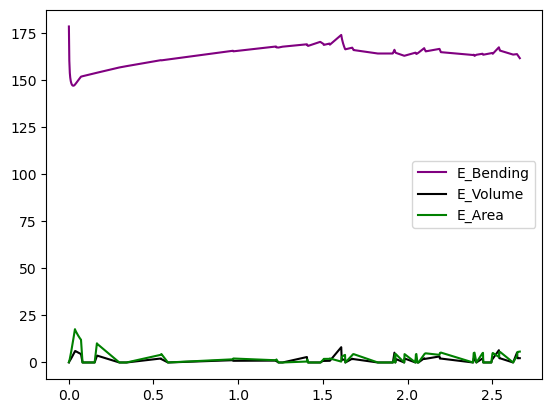

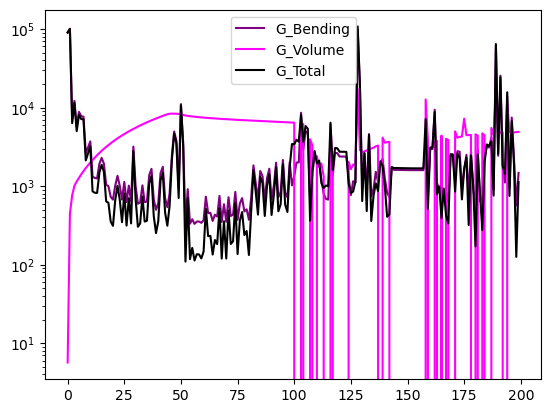

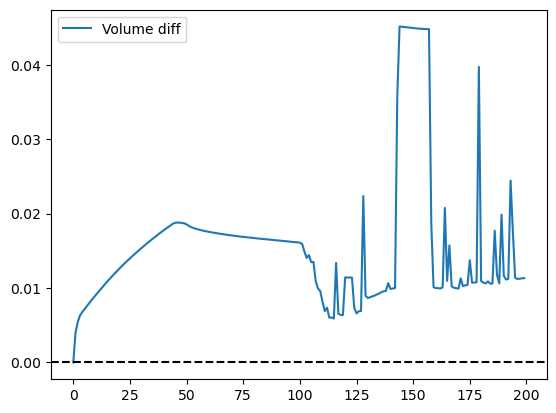

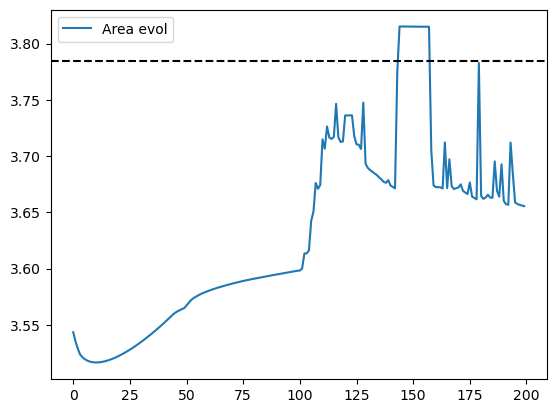

In [13]:
Prolate_A = Sims_dir +"5/"

Sim_data_Prolate_A = np.loadtxt(Prolate_A+"Output_data.txt",skiprows=1)

# plt.plot(Sim_data[:,0])


E_Bending_Prolate_A = Sim_data_Prolate_A[:,3 ]
E_Volume_Prolate_A  = Sim_data_Prolate_A[:,4]
E_Area_Prolate_A  = Sim_data_Prolate_A[:,5]
E_Tot_Prolate_A = Sim_data_Prolate_A[:,7]

plt.plot(Sim_data_Prolate_A[:,0],E_Bending_Prolate_A,color='purple',label='E_Bending')
plt.plot(Sim_data_Prolate_A[:,0],E_Volume_Prolate_A,color='black',label='E_Volume')
plt.plot(Sim_data_Prolate_A[:,0],E_Area_Prolate_A,color='green',label='E_Area')


plt.legend()
# plt.plot(Sim_data_2[:,0],E_Volume_2,color='magenta')
# plt.plot(E_Tot_2, color='black')
# plt.xlim(0.12,0.14)
plt.show()

G_Bending_Prolate_A = Sim_data_Prolate_A[:,8]
G_Volume_Prolate_A = Sim_data_Prolate_A[:,9]
G_Tot_Prolate_A = Sim_data_Prolate_A[:,12]

plt.plot(G_Bending_Prolate_A,color='purple',label='G_Bending')
plt.plot(G_Volume_Prolate_A,color='magenta',label='G_Volume')
plt.plot(G_Tot_Prolate_A, color='black',label= 'G_Total')
plt.legend()
plt.yscale('log')
plt.show()


plt.plot(Sim_data_Prolate_A[:,1]-Sim_data_Prolate_A[0,1],label='Volume diff')
plt.axhline(0,ls='dashed',color='black')
plt.legend()
plt.show()
plt.plot(Sim_data_Prolate_A[:,2],label='Area evol')
plt.axhline(3.78447,color='black',ls='dashed')
plt.legend()



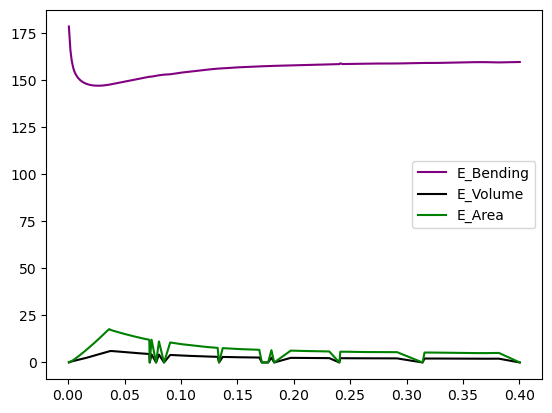

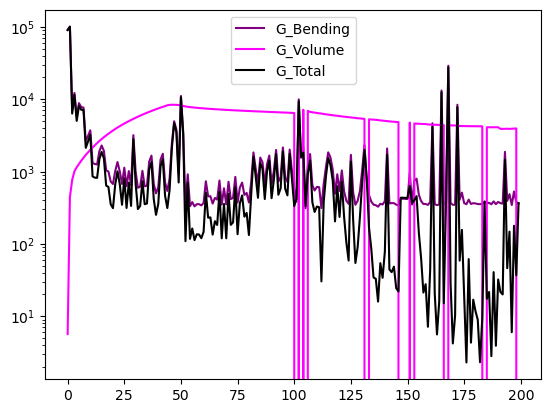

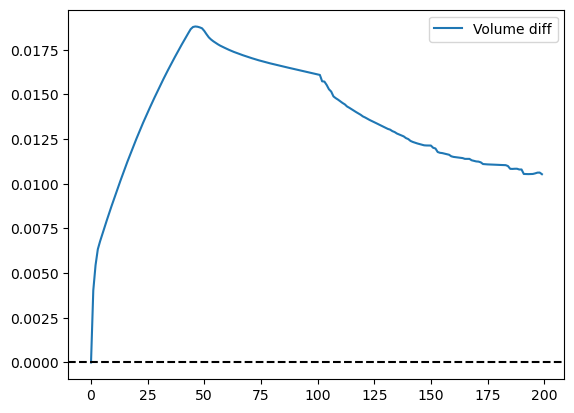

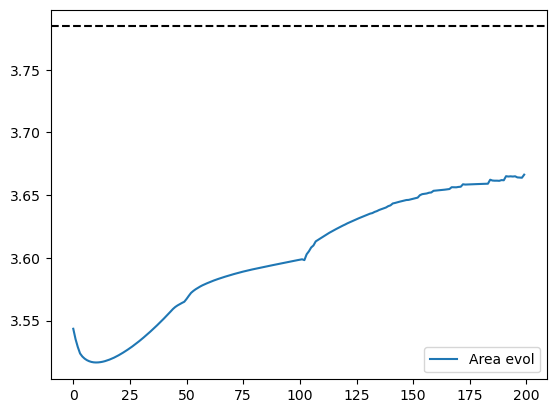

In [14]:
Prolate_B = Sims_dir +"6/"

Sim_data_Prolate_B = np.loadtxt(Prolate_B+"Output_data.txt",skiprows=1)

# plt.plot(Sim_data[:,0])


E_Bending_Prolate_B = Sim_data_Prolate_B[:,3 ]
E_Volume_Prolate_B  = Sim_data_Prolate_B[:,4]
E_Area_Prolate_B  = Sim_data_Prolate_B[:,5]
E_Tot_Prolate_B = Sim_data_Prolate_B[:,7]

plt.plot(Sim_data_Prolate_B[:,0],E_Bending_Prolate_B,color='purple',label='E_Bending')
plt.plot(Sim_data_Prolate_B[:,0],E_Volume_Prolate_B,color='black',label='E_Volume')
plt.plot(Sim_data_Prolate_B[:,0],E_Area_Prolate_B,color='green',label='E_Area')


plt.legend()
# plt.plot(Sim_data_2[:,0],E_Volume_2,color='magenta')
# plt.plot(E_Tot_2, color='black')
# plt.xlim(0.12,0.14)
plt.show()

G_Bending_Prolate_B = Sim_data_Prolate_B[:,8]
G_Volume_Prolate_B = Sim_data_Prolate_B[:,9]
G_Tot_Prolate_B = Sim_data_Prolate_B[:,12]

plt.plot(G_Bending_Prolate_B,color='purple',label='G_Bending')
plt.plot(G_Volume_Prolate_B,color='magenta',label='G_Volume')
plt.plot(G_Tot_Prolate_B, color='black',label= 'G_Total')
plt.legend()
plt.yscale('log')
plt.show()


plt.plot(Sim_data_Prolate_B[:,1]-Sim_data_Prolate_B[0,1],label='Volume diff')
plt.axhline(0,ls='dashed',color='black')
plt.legend()
plt.show()
plt.plot(Sim_data_Prolate_B[:,2],label='Area evol')
plt.axhline(3.78447,color='black',ls='dashed')
plt.legend()



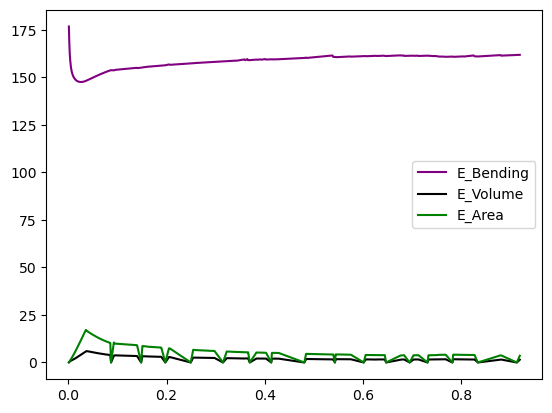

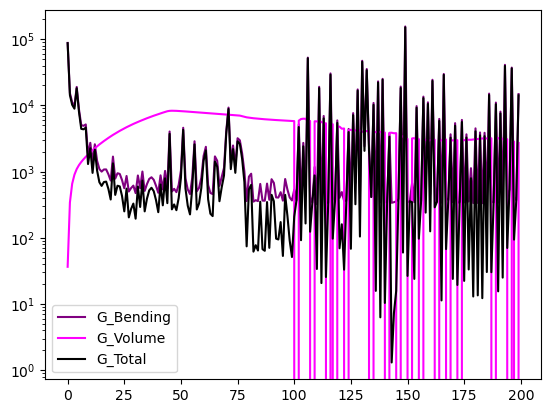

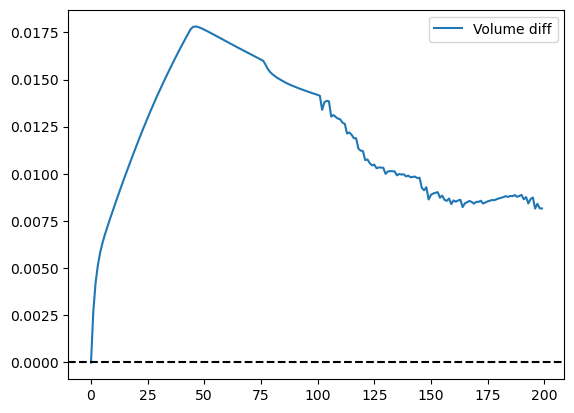

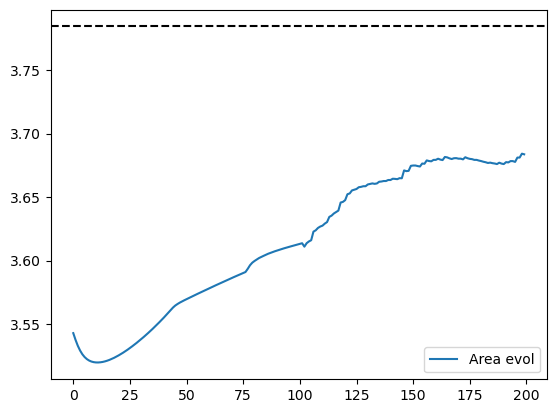

In [15]:
Prolate_C = Sims_dir +"7/"

Sim_data_Prolate_C  = np.loadtxt(Prolate_C+"Output_data.txt",skiprows=1)

# plt.plot(Sim_data[:,0])


E_Bending_Prolate_C = Sim_data_Prolate_C[:,3 ]
E_Volume_Prolate_C  = Sim_data_Prolate_C[:,4]
E_Area_Prolate_C  = Sim_data_Prolate_C[:,5]
E_Tot_Prolate_C = Sim_data_Prolate_C[:,7]

plt.plot(Sim_data_Prolate_C[:,0],E_Bending_Prolate_C,color='purple',label='E_Bending')
plt.plot(Sim_data_Prolate_C[:,0],E_Volume_Prolate_C,color='black',label='E_Volume')
plt.plot(Sim_data_Prolate_C[:,0],E_Area_Prolate_C,color='green',label='E_Area')


plt.legend()
# plt.plot(Sim_data_2[:,0],E_Volume_2,color='magenta')
# plt.plot(E_Tot_2, color='black')
# plt.xlim(0.12,0.14)
plt.show()

G_Bending_Prolate_C = Sim_data_Prolate_C[:,8]
G_Volume_Prolate_C = Sim_data_Prolate_C[:,9]
G_Tot_Prolate_C = Sim_data_Prolate_C[:,12]

plt.plot(G_Bending_Prolate_C,color='purple',label='G_Bending')
plt.plot(G_Volume_Prolate_C,color='magenta',label='G_Volume')
plt.plot(G_Tot_Prolate_C, color='black',label= 'G_Total')
plt.legend()
plt.yscale('log')
plt.show()


plt.plot(Sim_data_Prolate_C[:,1]-Sim_data_Prolate_C[0,1],label='Volume diff')
plt.axhline(0,ls='dashed',color='black')
plt.legend()
plt.show()
plt.plot(Sim_data_Prolate_C[:,2],label='Area evol')
plt.axhline(3.78447,color='black',ls='dashed')
plt.legend()


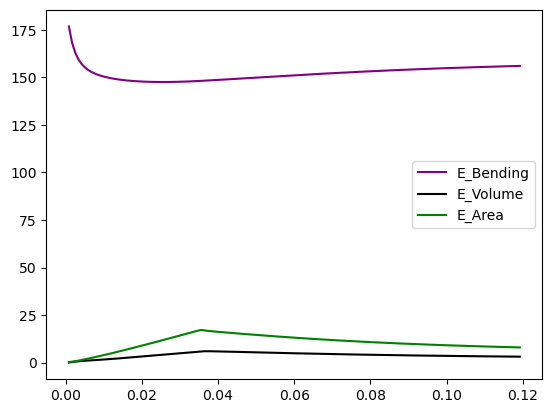

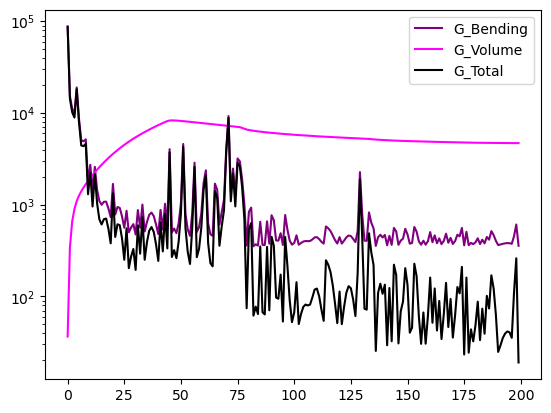

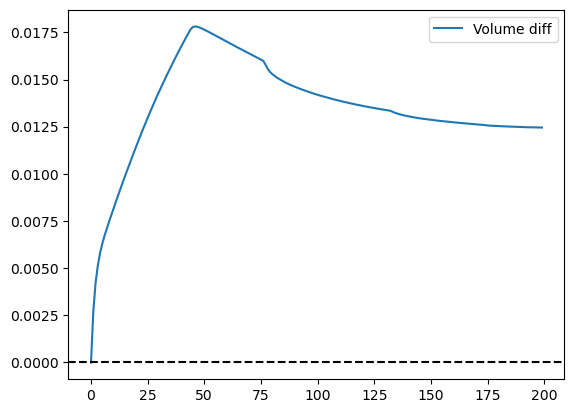

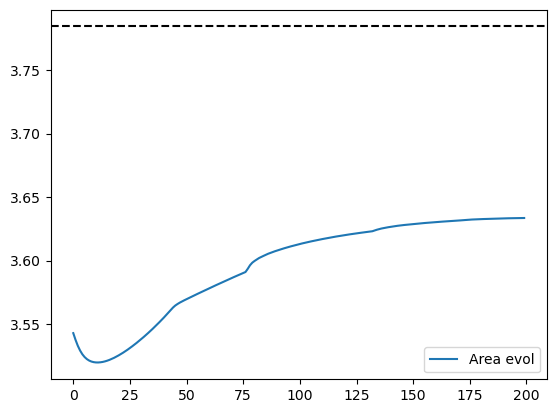

In [16]:
Prolate_D = Sims_dir +"8/"

Sim_data_Prolate_D  = np.loadtxt(Prolate_D+"Output_data.txt",skiprows=1)

# plt.plot(Sim_data[:,0])


E_Bending_Prolate_D = Sim_data_Prolate_D[:,3 ]
E_Volume_Prolate_D  = Sim_data_Prolate_D[:,4]
E_Area_Prolate_D  = Sim_data_Prolate_D[:,5]
E_Tot_Prolate_D = Sim_data_Prolate_D[:,7]

plt.plot(Sim_data_Prolate_D[:,0],E_Bending_Prolate_D,color='purple',label='E_Bending')
plt.plot(Sim_data_Prolate_D[:,0],E_Volume_Prolate_D,color='black',label='E_Volume')
plt.plot(Sim_data_Prolate_D[:,0],E_Area_Prolate_D,color='green',label='E_Area')


plt.legend()
# plt.plot(Sim_data_2[:,0],E_Volume_2,color='magenta')
# plt.plot(E_Tot_2, color='black')
# plt.xlim(0.12,0.14)
plt.show()

G_Bending_Prolate_D = Sim_data_Prolate_D[:,8]
G_Volume_Prolate_D = Sim_data_Prolate_D[:,9]
G_Tot_Prolate_D = Sim_data_Prolate_D[:,12]

plt.plot(G_Bending_Prolate_D,color='purple',label='G_Bending')
plt.plot(G_Volume_Prolate_D,color='magenta',label='G_Volume')
plt.plot(G_Tot_Prolate_D, color='black',label= 'G_Total')
plt.legend()
plt.yscale('log')
plt.show()


plt.plot(Sim_data_Prolate_D[:,1]-Sim_data_Prolate_D[0,1],label='Volume diff')
plt.axhline(0,ls='dashed',color='black')
plt.legend()
plt.show()
plt.plot(Sim_data_Prolate_D[:,2],label='Area evol')
plt.axhline(3.78447,color='black',ls='dashed')
plt.legend()


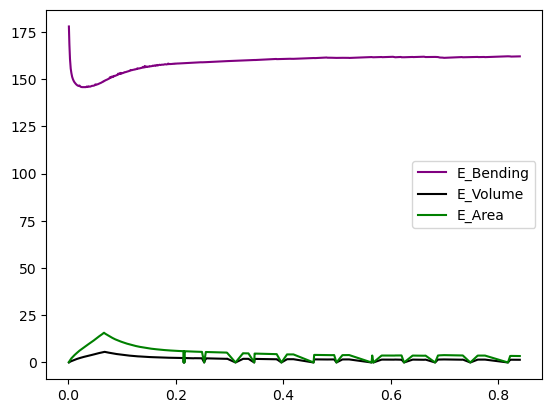

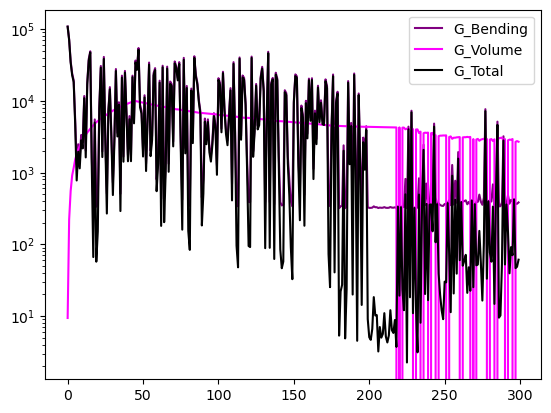

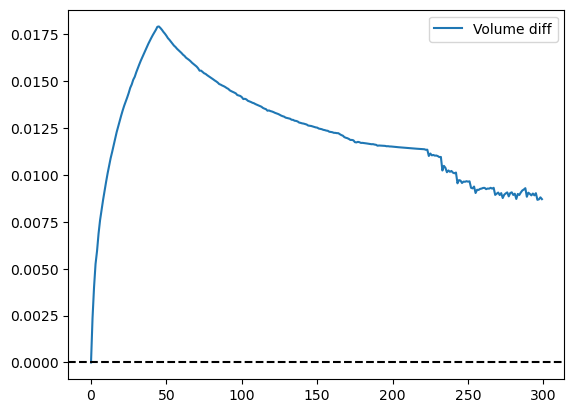

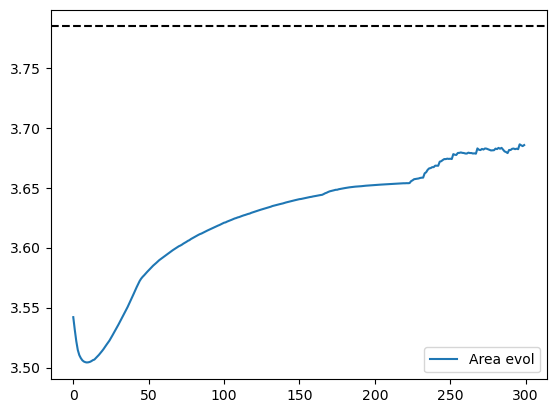

In [17]:
Prolate_E = Sims_dir +"10/"

Sim_data_Prolate_E  = np.loadtxt(Prolate_E+"Output_data.txt",skiprows=1)

# plt.plot(Sim_data[:,0])


E_Bending_Prolate_E = Sim_data_Prolate_E[:,3 ]
E_Volume_Prolate_E  = Sim_data_Prolate_E[:,4]
E_Area_Prolate_E  = Sim_data_Prolate_E[:,5]
E_Tot_Prolate_E = Sim_data_Prolate_E[:,7]

plt.plot(Sim_data_Prolate_E[:,0],E_Bending_Prolate_E,color='purple',label='E_Bending')
plt.plot(Sim_data_Prolate_E[:,0],E_Volume_Prolate_E,color='black',label='E_Volume')
plt.plot(Sim_data_Prolate_E[:,0],E_Area_Prolate_E,color='green',label='E_Area')


plt.legend()
# plt.plot(Sim_data_2[:,0],E_Volume_2,color='magenta')
# plt.plot(E_Tot_2, color='black')
# plt.xlim(0.12,0.14)
plt.show()

G_Bending_Prolate_E = Sim_data_Prolate_E[:,8]
G_Volume_Prolate_E = Sim_data_Prolate_E[:,9]
G_Tot_Prolate_E = Sim_data_Prolate_E[:,12]

plt.plot(G_Bending_Prolate_E,color='purple',label='G_Bending')
plt.plot(G_Volume_Prolate_E,color='magenta',label='G_Volume')
plt.plot(G_Tot_Prolate_E, color='black',label= 'G_Total')
plt.legend()
plt.yscale('log')
plt.show()


plt.plot(Sim_data_Prolate_E[:,1]-Sim_data_Prolate_E[0,1],label='Volume diff')
plt.axhline(0,ls='dashed',color='black')
plt.legend()
plt.show()
plt.plot(Sim_data_Prolate_E[:,2],label='Area evol')
plt.axhline(3.78447,color='black',ls='dashed')
plt.legend()

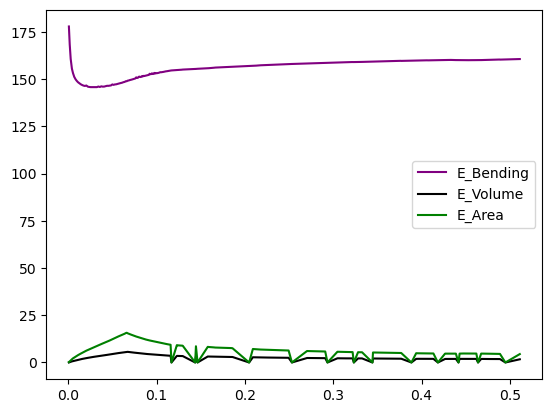

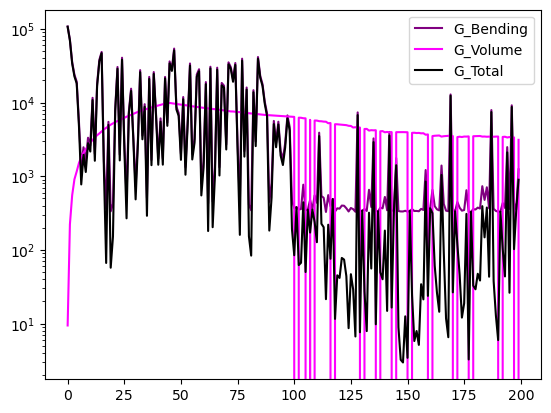

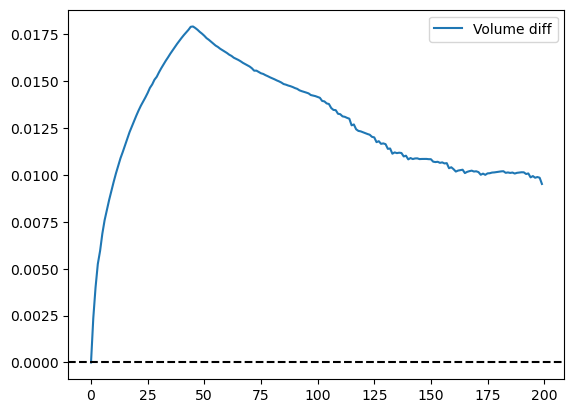

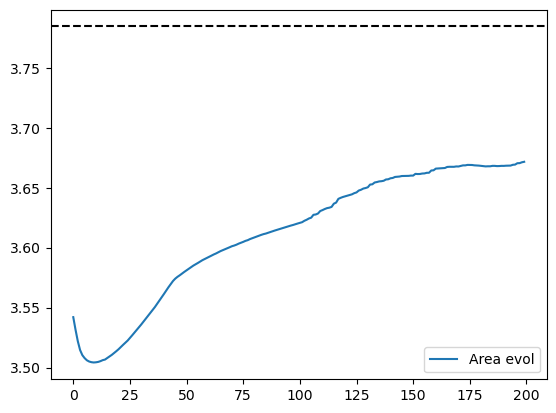

In [18]:
Prolate_F = Sims_dir +"12/"

Sim_data_Prolate_F  = np.loadtxt(Prolate_F+"Output_data.txt",skiprows=1)

# plt.plot(Sim_data[:,0])


E_Bending_Prolate_F = Sim_data_Prolate_F[:,3 ]
E_Volume_Prolate_F  = Sim_data_Prolate_F[:,4]
E_Area_Prolate_F  = Sim_data_Prolate_F[:,5]
E_Tot_Prolate_F = Sim_data_Prolate_F[:,7]

plt.plot(Sim_data_Prolate_F[:,0],E_Bending_Prolate_F,color='purple',label='E_Bending')
plt.plot(Sim_data_Prolate_F[:,0],E_Volume_Prolate_F,color='black',label='E_Volume')
plt.plot(Sim_data_Prolate_F[:,0],E_Area_Prolate_F,color='green',label='E_Area')


plt.legend()
# plt.plot(Sim_data_2[:,0],E_Volume_2,color='magenta')
# plt.plot(E_Tot_2, color='black')
# plt.xlim(0.12,0.14)
plt.show()

G_Bending_Prolate_F = Sim_data_Prolate_F[:,8]
G_Volume_Prolate_F = Sim_data_Prolate_F[:,9]
G_Tot_Prolate_F = Sim_data_Prolate_F[:,12]

plt.plot(G_Bending_Prolate_F,color='purple',label='G_Bending')
plt.plot(G_Volume_Prolate_F,color='magenta',label='G_Volume')
plt.plot(G_Tot_Prolate_F, color='black',label= 'G_Total')
plt.legend()
plt.yscale('log')
plt.show()


plt.plot(Sim_data_Prolate_F[:,1]-Sim_data_Prolate_F[0,1],label='Volume diff')
plt.axhline(0,ls='dashed',color='black')
plt.legend()
plt.show()
plt.plot(Sim_data_Prolate_F[:,2],label='Area evol')
plt.axhline(3.78447,color='black',ls='dashed')
plt.legend()

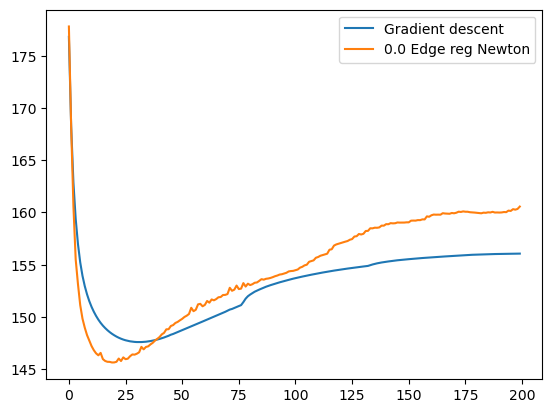

In [21]:


# plt.plot(E_Bending_Prolate_A,label='10.0 Edge reg Newton')
# plt.plot(E_Bending_Prolate_B,label='1.0 Edge reg Newton')
# plt.plot(E_Bending_Prolate_C,label='0.1 Edge reg Newton')
plt.plot(E_Bending_Prolate_D,label='Gradient descent')
# plt.plot(E_Bending_Prolate_E,label='Gradient descent')
plt.plot(E_Bending_Prolate_F,label='0.0 Edge reg Newton')

plt.legend()

Text(0.5, 1.0, 'Total Energy')

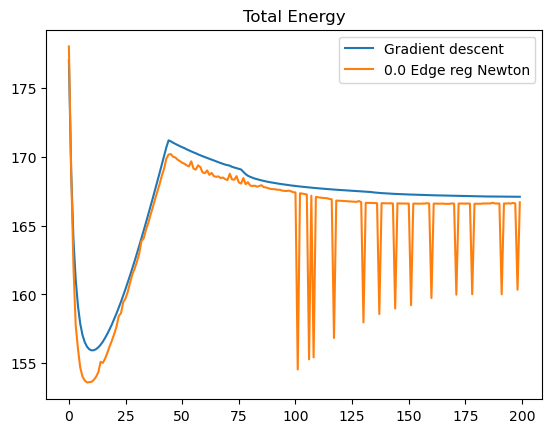

In [20]:

# plt.plot(E_Tot_Prolate_A,label='10.0 Edge reg Newton')
# plt.plot(E_Tot_Prolate_B,label='1.0 Edge reg Newton')
# plt.plot(E_Tot_Prolate_C,label='0.1 Edge reg Newton')
plt.plot(E_Tot_Prolate_D,label='Gradient descent')
# plt.plot(E_Tot_Prolate_E,label='Gradient descent +Newtonlater')
plt.plot(E_Tot_Prolate_F,label='0.0 Edge reg Newton')
plt.legend()
plt.title("Total Energy")

In [45]:
Results_dir = current_dir+'/../Results/'
Sims_dir = Results_dir + 'Wrapping_single_Newton/'

In [ ]:
Wrapping_grad = Sims_dir +"2/"

Sim_data_Wrapping_grad  = np.loadtxt(Wrapping_grad+"Output_data.txt",skiprows=1)

# plt.plot(Sim_data[:,0])


E_Bending_Wrapping_grad = Sim_data_Wrapping_grad[:,3 ]
E_Volume_Wrapping_grad  = Sim_data_Wrapping_grad[:,4]
E_Area_Wrapping_grad  = Sim_data_Wrapping_grad[:,5]
E_Tot_Wrapping_grad = Sim_data_Wrapping_grad[:,7]

plt.plot(Sim_data_Prolate_F[:,0],E_Bending_Prolate_F,color='purple',label='E_Bending')
plt.plot(Sim_data_Prolate_F[:,0],E_Volume_Prolate_F,color='black',label='E_Volume')
plt.plot(Sim_data_Prolate_F[:,0],E_Area_Prolate_F,color='green',label='E_Area')


plt.legend()
# plt.plot(Sim_data_2[:,0],E_Volume_2,color='magenta')
# plt.plot(E_Tot_2, color='black')
# plt.xlim(0.12,0.14)
plt.show()

G_Bending_Prolate_F = Sim_data_Prolate_F[:,8]
G_Volume_Prolate_F = Sim_data_Prolate_F[:,9]
G_Tot_Prolate_F = Sim_data_Prolate_F[:,12]

plt.plot(G_Bending_Prolate_F,color='purple',label='G_Bending')
plt.plot(G_Volume_Prolate_F,color='magenta',label='G_Volume')
plt.plot(G_Tot_Prolate_F, color='black',label= 'G_Total')
plt.legend()
plt.yscale('log')
plt.show()


plt.plot(Sim_data_Prolate_F[:,1]-Sim_data_Prolate_F[0,1],label='Volume diff')
plt.axhline(0,ls='dashed',color='black')
plt.legend()
plt.show()
plt.plot(Sim_data_Prolate_F[:,2],label='Area evol')
plt.axhline(3.78447,color='black',ls='dashed')
plt.legend()

In [46]:
current_dir = os.getcwd()
current_dir

'/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts'

In [47]:
Results_dir = current_dir+'/../Results/'
Sims_dir = Results_dir + 'Two_beads_inside_inside/'

In [5]:
dir_list = os.listdir(Sims_dir)

print("The directories are :\n")
for i in dir_list:
    print("{}".format(i))

The directories are :

6
9
8
7
1
Bending_20.0000_Volume_constraint_10000.0000_33.3189_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bonds_Harmonic_400.0000_Harmonic_400.0000_Switch_No_remesh_Nsim_1
3
4
5
2


In [48]:
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0.3, vmax=1.8)

/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_inside_inside/1/Output_data.txt
THe angle is 0.29999999999999993
THe length is 0.5080896504102372
/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_inside_inside/2/Output_data.txt
THe angle is 0.325
THe length is 0.5500716329009933
/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_inside_inside/3/Output_data.txt
THe angle is 0.35
THe length is 0.5919676678182262
/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_inside_inside/4/Output_data.txt
THe angle is 0.375
THe length is 0.6337712089917177
/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_inside_inside/5/Output_data.txt
THe angle is 0.4
THe length is 0.6754757247032082
/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/g

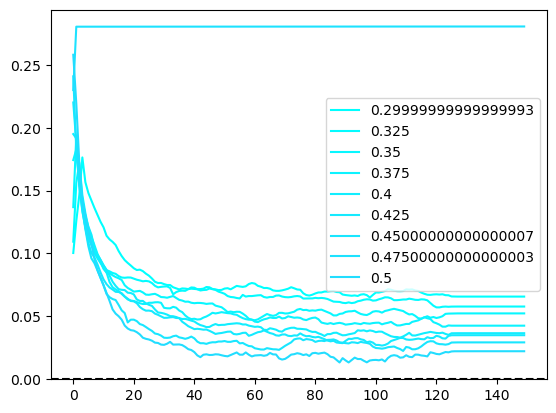

In [49]:
# Now we have the directory to start finally our processing

Bead_DISTANCES = []
Thetas = []


for i in range(1,10):
    E_Bead_1 = []
    E_Bead_2 = []
    E_Bend = []
    E_Sur = []
    # i = 5
    # Simulation = Sims_dir+"Bending_20.0000_Volume_constraint_10000.0000_33.3189_Edge_reg_0.0000_1.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bonds_Harmonic_400.0000_Harmonic_400.0000_Switch_Newton_Nsim_3"+"/"
    Simulation = Sims_dir+"{}".format(i)+"/"


    Output_dir = Simulation+'Output_data.txt'
    print(Output_dir)
    Data_sim = json.load(open(Simulation+"Input_file.json"))

    Pos2 = Data_sim['Beads'][1]['Pos']
    # print("The bead is initially at position {}".format(Data_sim["Beads"][1]["Pos"]))

    angle = np.arctan2(Pos2[1],Pos2[0])
    L0 = Data_sim['Beads'][0]['bonds_constants'][0][1]
    print("THe angle is {}".format(angle))
    print("THe length is {}".format(L0))

    Sim_data = np.loadtxt(Output_dir,skiprows=1,usecols=[3,4,5,6,7])



    E_Bend = Sim_data[:,0]
    E_Vol = Sim_data[:,1]
    E_Bead_1 = Sim_data[:,2]
    E_Bead_2 = Sim_data[:,3]

    E_Tot = Sim_data[:,4]

    Bead_1_traj = np.loadtxt(Simulation+"Bead_0_data.txt",skiprows=1)
    Bead_2_traj = np.loadtxt(Simulation+"Bead_1_data.txt",skiprows=1)
    Bead_1_pos = Bead_1_traj[-1,0:3]
    Bead_2_pos = Bead_2_traj[-1,0:3]

    Bead_distance = []
    for j in range(len(Bead_1_traj)):
        Bead_1_pos = Bead_1_traj[j,0:3]
        Bead_2_pos = Bead_2_traj[j,0:3]
        r = np.linalg.norm( Bead_1_pos-Bead_2_pos ) - L0
        Bead_distance.append(r)
    plt.plot(Bead_distance,label='{}'.format(angle),color=cmap(norm(angle)))
plt.legend()
plt.axhline(0.0,ls='dashed',color='black')




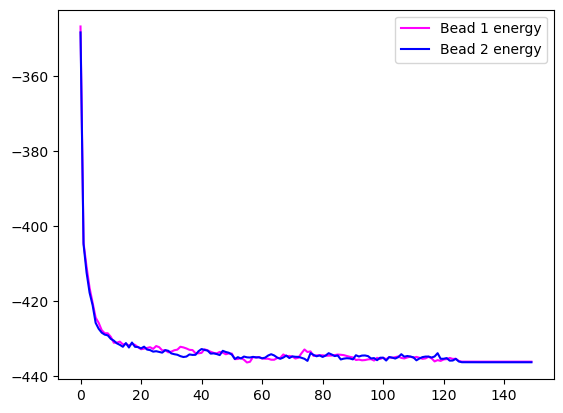

In [21]:
# plt.plot(E_Tot, label='Total energy',color='black')
plt.plot(E_Bead_1, label='Bead 1 energy',color='magenta')
# plt.plot(E_Bend/(20*4*np.pi), label='Bending energy',color='purple')
# plt.plot(E_Vol, label='Volume energy',color='green')
plt.plot(E_Bead_2, label='Bead 2 energy',color='blue')
plt.legend()

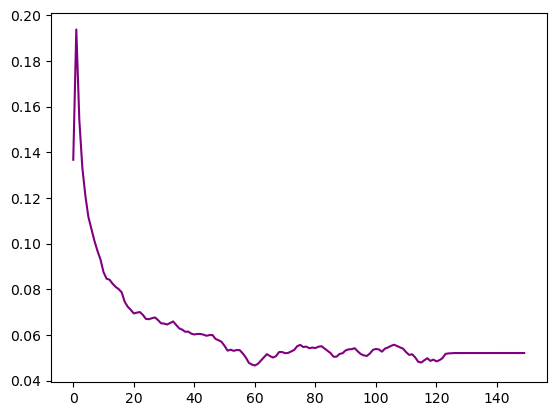

The distance between the beads is 0.6440352948867101


In [23]:

plt.plot(Bead_distance,color='purple')
# plt.axhline(0.5919676678182262,color='black',ls='dashed')
plt.show()

r = np.linalg.norm( Bead_1_pos-Bead_2_pos )
print("The distance between the beads is {}".format(r))


In [32]:
Results_dir = current_dir+'/../Results/'
Sims_dir = Results_dir + 'Two_beads_outside_outside/'

In [33]:
dir_list = os.listdir(Sims_dir)

print("The directories are :\n")
for i in dir_list:
    print("{}".format(i))

The directories are :

6
7
1
Bending_20.0000_Volume_constraint_10000.0000_33.3189_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bonds_Harmonic_400.0000_Harmonic_400.0000_Switch_No_remesh_Nsim_1
3
4
5
2


/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_outside_outside/1/Output_data.txt
THe angle is 0.325
THe length is 0.7442145621601673
/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_outside_outside/2/Output_data.txt
THe angle is 0.35000000000000003
THe length is 0.8008974329305413
/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_outside_outside/3/Output_data.txt
THe angle is 0.37500000000000006
THe length is 0.8574551651064415
/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_outside_outside/4/Output_data.txt
THe angle is 0.37500000000000006
THe length is 0.8574551651064415
/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_outside_outside/5/Output_data.txt
THe angle is 0.4
THe length is 0.9138789216572816
/home/mrojasve/Docum

(-0.05, 0.05)

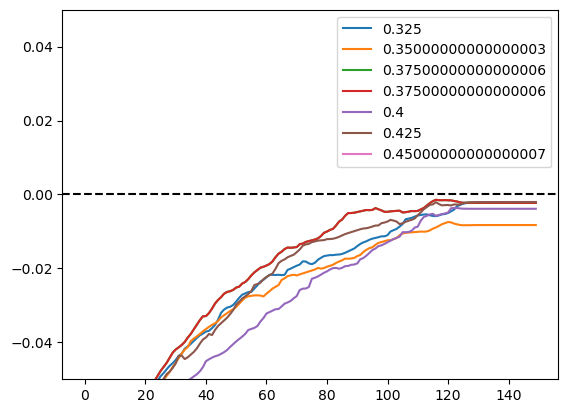

In [36]:
# Now we have the directory to start finally our processing

Bead_DISTANCES = []
Thetas = []


for i in range(1,8):
    E_Bead_1 = []
    E_Bead_2 = []
    E_Bend = []
    E_Sur = []
    # i = 5
    # Simulation = Sims_dir+"Bending_20.0000_Volume_constraint_10000.0000_33.3189_Edge_reg_0.0000_1.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bonds_Harmonic_400.0000_Harmonic_400.0000_Switch_Newton_Nsim_3"+"/"
    Simulation = Sims_dir+"{}".format(i)+"/"


    Output_dir = Simulation+'Output_data.txt'
    print(Output_dir)
    Data_sim = json.load(open(Simulation+"Input_file.json"))

    Pos2 = Data_sim['Beads'][1]['Pos']
    # print("The bead is initially at position {}".format(Data_sim["Beads"][1]["Pos"]))

    angle = np.arctan2(Pos2[1],Pos2[0])
    L0 = Data_sim['Beads'][0]['bonds_constants'][0][1]
    print("THe angle is {}".format(angle))
    print("THe length is {}".format(L0))

    Sim_data = np.loadtxt(Output_dir,skiprows=1,usecols=[3,4,5,6,7])



    E_Bend = Sim_data[:,0]
    E_Vol = Sim_data[:,1]
    E_Bead_1 = Sim_data[:,2]
    E_Bead_2 = Sim_data[:,3]

    E_Tot = Sim_data[:,4]

    Bead_1_traj = np.loadtxt(Simulation+"Bead_0_data.txt",skiprows=1)
    Bead_2_traj = np.loadtxt(Simulation+"Bead_1_data.txt",skiprows=1)
    Bead_1_pos = Bead_1_traj[-1,0:3]
    Bead_2_pos = Bead_2_traj[-1,0:3]

    Bead_distance = []
    for j in range(len(Bead_1_traj)):
        Bead_1_pos = Bead_1_traj[j,0:3]
        Bead_2_pos = Bead_2_traj[j,0:3]
        r = np.linalg.norm( Bead_1_pos-Bead_2_pos ) - L0
        Bead_distance.append(r)
    plt.plot(Bead_distance,label='{}'.format(angle))
plt.legend()
plt.axhline(0.0,ls='dashed',color='black')

plt.ylim(-0.05,0.05)


In [37]:
Results_dir = current_dir+'/../Results/'
Sims_dir = Results_dir + 'Two_beads_inside_outside/'

In [38]:
dir_list = os.listdir(Sims_dir)

print("The directories are :\n")
for i in dir_list:
    print("{}".format(i))

The directories are :

6
7
1
Bending_20.0000_Volume_constraint_10000.0000_33.3189_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bonds_Harmonic_400.0000_Harmonic_400.0000_Switch_No_remesh_Nsim_1
3
4
5
2


/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_inside_outside/1/Output_data.txt
THe angle is 0.325
THe length is 0.8771381415923838
/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_inside_outside/2/Output_data.txt
THe angle is 0.35000000000000003
THe length is 0.9132937016828138
/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_inside_outside/3/Output_data.txt
THe angle is 0.37500000000000006
THe length is 0.9504895563054346
/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_inside_outside/4/Output_data.txt
THe angle is 0.37500000000000006
THe length is 0.9504895563054346
/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_inside_outside/5/Output_data.txt
THe angle is 0.4
THe length is 0.9885863780658918
/home/mrojasve/Documents/

(-0.05, 0.05)

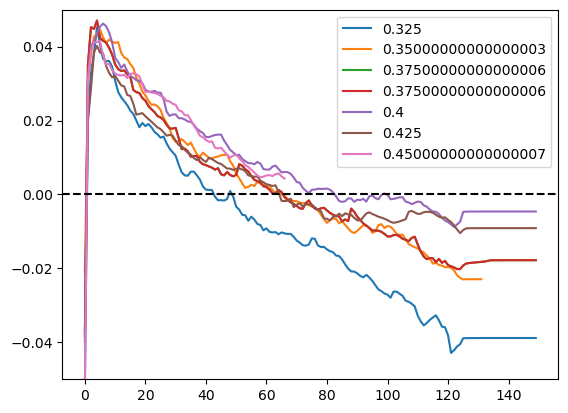

In [39]:
# Now we have the directory to start finally our processing

Bead_DISTANCES = []
Thetas = []


for i in range(1,8):
    E_Bead_1 = []
    E_Bead_2 = []
    E_Bend = []
    E_Sur = []
    # i = 5
    # Simulation = Sims_dir+"Bending_20.0000_Volume_constraint_10000.0000_33.3189_Edge_reg_0.0000_1.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bonds_Harmonic_400.0000_Harmonic_400.0000_Switch_Newton_Nsim_3"+"/"
    Simulation = Sims_dir+"{}".format(i)+"/"


    Output_dir = Simulation+'Output_data.txt'
    print(Output_dir)
    Data_sim = json.load(open(Simulation+"Input_file.json"))

    Pos2 = Data_sim['Beads'][1]['Pos']
    # print("The bead is initially at position {}".format(Data_sim["Beads"][1]["Pos"]))

    angle = np.arctan2(Pos2[1],Pos2[0])
    L0 = Data_sim['Beads'][0]['bonds_constants'][0][1]
    print("THe angle is {}".format(angle))
    print("THe length is {}".format(L0))

    Sim_data = np.loadtxt(Output_dir,skiprows=1,usecols=[3,4,5,6,7])



    E_Bend = Sim_data[:,0]
    E_Vol = Sim_data[:,1]
    E_Bead_1 = Sim_data[:,2]
    E_Bead_2 = Sim_data[:,3]

    E_Tot = Sim_data[:,4]

    Bead_1_traj = np.loadtxt(Simulation+"Bead_0_data.txt",skiprows=1)
    Bead_2_traj = np.loadtxt(Simulation+"Bead_1_data.txt",skiprows=1)
    Bead_1_pos = Bead_1_traj[-1,0:3]
    Bead_2_pos = Bead_2_traj[-1,0:3]

    Bead_distance = []
    for j in range(len(Bead_1_traj)):
        Bead_1_pos = Bead_1_traj[j,0:3]
        Bead_2_pos = Bead_2_traj[j,0:3]
        r = np.linalg.norm( Bead_1_pos-Bead_2_pos ) - L0
        Bead_distance.append(r)
    plt.plot(Bead_distance,label='{}'.format(angle))
plt.legend()
plt.axhline(0.0,ls='dashed',color='black')

plt.ylim(-0.05,0.05)


In [9]:
# Now we have the directory to start finally our processing


Thetas = []
E_Bead_1 = []
E_Bead_2 = []
E_Bend = []
E_Sur = []
i = 5
Simulation = Sims_dir+"Bending_20.0000_Volume_constraint_10000.0000_33.3189_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bonds_Harmonic_400.0000_Harmonic_400.0000_Switch_Newton_Nsim_1"+"/"
Output_dir = Simulation+'Output_data.txt'
print(Output_dir)

Sim_data = np.loadtxt(Output_dir,skiprows=1,usecols=[3,4,5,6,7])

E_Bend = Sim_data[:,0]
E_Vol = Sim_data[:,1]
E_Bead_1 = Sim_data[:,2]
E_Bead_2 = Sim_data[:,3]

E_Tot = Sim_data[:,4]

Bead_1_traj = np.loadtxt(Simulation+"Bead_0_data.txt",skiprows=1)
Bead_2_traj = np.loadtxt(Simulation+"Bead_1_data.txt",skiprows=1)
Bead_1_pos = Bead_1_traj[-1,0:3]
Bead_2_pos = Bead_2_traj[-1,0:3]

Bead_distance = []
for j in range(len(Bead_1_traj)):
    Bead_1_pos = Bead_1_traj[j,0:3]
    Bead_2_pos = Bead_2_traj[j,0:3]
    r = np.linalg.norm( Bead_1_pos-Bead_2_pos )
    Bead_distance.append(r)



/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_GM_one_inside/Bending_20.0000_Volume_constraint_10000.0000_33.3189_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bonds_Harmonic_400.0000_Harmonic_400.0000_Switch_Newton_Nsim_1/Output_data.txt


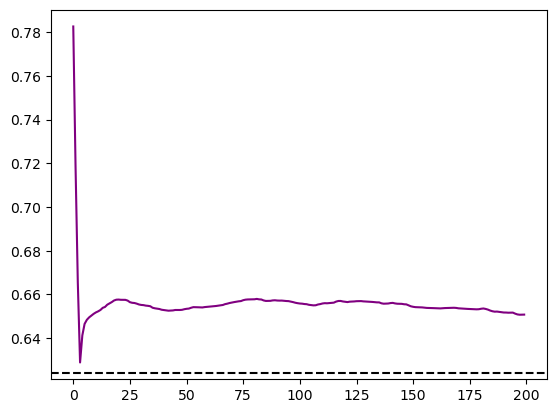

The distance between the beads is 0.6507844125360374


In [10]:
plt.plot(Bead_distance,color='purple')
plt.axhline(0.6242890304516107,color='black',ls='dashed')

plt.show()

r = np.linalg.norm( Bead_1_pos-Bead_2_pos )
print("The distance between the beads is {}".format(r))

(-460.0, -440.0)

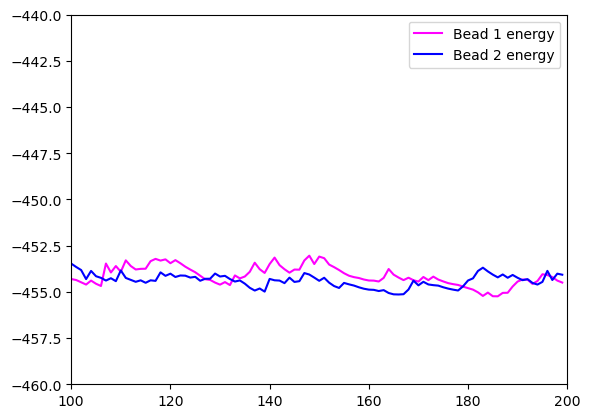

In [30]:
# plt.plot(E_Tot, label='Total energy',color='black')
plt.plot(E_Bead_1, label='Bead 1 energy',color='magenta')
# plt.plot(E_Bend/20, label='Bending energy',color='purple')
# plt.plot(E_Vol, label='Volume energy',color='green')
plt.plot(E_Bead_2, label='Bead 2 energy',color='blue')
plt.legend()
plt.xlim(100,200)
plt.ylim(-460,-440)

In [31]:
theta = np.linspace(0.0,0.4,100)

dist = 1.6*np.sqrt(2-2*np.cos(theta))

In [36]:
1.6*np.sqrt(2-2*np.cos(0.3))

np.float64(0.4782020239155178)

In [40]:
import matplotlib as mpl



In [42]:
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0.3, vmax=1.8)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

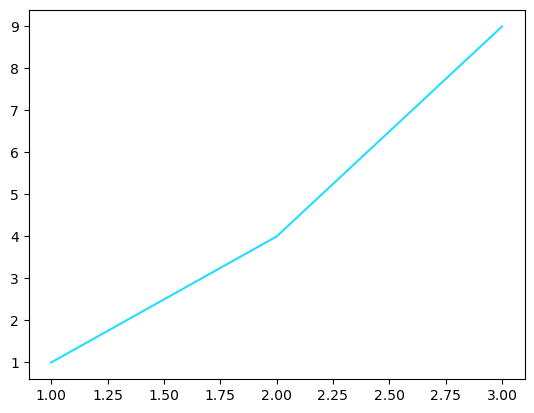

In [44]:
plt.plot([1,2,3], [1,4,9], color=cmap(norm(0.5)), label='0.5')
# plt.colorbar()